In [1]:
import os
import numpy as np
import sys
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import torch


def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')


from utils.testing_gen import get_mult_data, Parameters_Simulation
import features as ft
from utils.pysr_help import getEdges, get_weights
from utils.loading import loadModel



NB_SIM = 5
NB_STEP = 200
PATH_MODELS = '/master/code/experimental/pysr/gam/models'
DISPLAY_PATH = '/master/code/experimental/pysr/gam/weights_evol'
MODEL = 'GAM_GNN'

yessss


In [2]:

def getData(params: Parameters_Simulation, nb:int):
    data = get_mult_data(params, nb)


    dataList = []

    for i in range(data.shape[0]):
        x, y, attr, inds = ft.processSimulation(data[i])

        for i in range(len(x)):
            g = Data(x = x[i][:, 2:], y = y[i], edge_attr = attr[i], edge_index = inds[i])
            dataList.append(g)

        return dataList
    


In [52]:
def find_models_and_paths(model_path:str, display_path:str)->tuple:
    model_list = []
    out_list = []
    
    nb = 0

    for root, dirs, files in os.walk(model_path):
        for file in files:
            if file.endswith('pt'):
                model_list.append(os.path.join(root, file))

                name = file.split('.')[0]

                out_list.append(os.path.join(display_path, f'test-{nb}-{name}.png'))
                nb += 1


    return model_list, out_list

In [53]:
models, path_out_models = find_models_and_paths(PATH_MODELS, DISPLAY_PATH)

In [5]:
params = Parameters_Simulation()
params.nbStep = NB_STEP
dataList = getData(params, nb = NB_SIM)
edges = getEdges(dataList)

v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 199/199 [00:04<00:00, 48.55it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 199/199 [00:03<00:00, 50.55it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 199/199 [00:03<00:00, 62.80it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 199/199 [00:02<00:00, 82.97it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 199/199 [00:03<00:00, 59.69it/s]


In [54]:
print(path_out_models)

['/master/code/experimental/pysr/gam/weights_evol/test-0-GAM_GNN_best.png', '/master/code/experimental/pysr/gam/weights_evol/test-1-GAM_GNN_latest.png', '/master/code/experimental/pysr/gam/weights_evol/test-2-GAM_GNN_best.png', '/master/code/experimental/pysr/gam/weights_evol/test-3-GAM_GNN_latest.png', '/master/code/experimental/pysr/gam/weights_evol/test-4-GAM_GNN_best.png', '/master/code/experimental/pysr/gam/weights_evol/test-5-GAM_GNN_latest.png', '/master/code/experimental/pysr/gam/weights_evol/test-6-GAM_GNN_best.png', '/master/code/experimental/pysr/gam/weights_evol/test-7-GAM_GNN_latest.png', '/master/code/experimental/pysr/gam/weights_evol/test-8-GAM_GNN_best.png', '/master/code/experimental/pysr/gam/weights_evol/test-9-GAM_GNN_latest.png']


In [6]:
i = 0

model = models[i]
path = path_out_models[i]


mod = loadModel(MODEL)
std_dict = torch.load(model)
mod.load_state_dict(std_dict)
mod.eval()

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


GAM_GNN(
  (GNN): GN_edge_GAM()
)

In [10]:
def get_weights(model, data, nbDim = 2, nbMax = 2, pySr_data = False):
    
    res = None
    resEdges = None

    if pySr_data:

        for graph in data:

            weights, sha = model.get_weights(graph)
            weights = weights.cpu().detach().numpy()
            weights.reshape(sha)

            if res is None:
                res = weights
                shape_edges =  graph.edge_attr.shape
                resEdges = graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()
            else:
                res = np.vstack((res, weights))
                shape_edges =  graph.edge_attr.shape
                v = graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()
                resEdges = np.vstack((resEdges, graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()))

        return res, resEdges

    else:
        for graph in data:

            weights, sha = model.get_weights(graph)
            weights = weights.cpu().detach().numpy()

            if res is None:
                res = weights

            else:
                res = np.vstack((res, weights))

        return res, None

In [55]:
weights, edgs = get_weights(mod, dataList, nbMax = None)

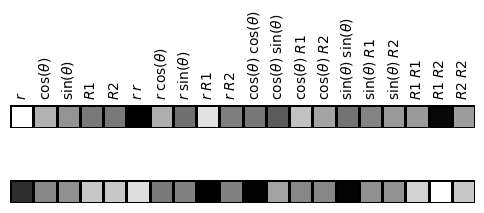

In [57]:
variables = [r'$r \;$', r'$\cos(\theta) \;$', r'$\sin(\theta) \;$', r'$R1 \;$', r'$R2 \;$']
degree = 2
result = compute_string_products(variables, degree)

pcolorPlot(np.median(weights, axis = 0), num_parts=2, labels = result*2)

#plt.savefig(...)

In [12]:
print(weights.shape)
print(edgs.shape)

(20174, 40)


AttributeError: 'NoneType' object has no attribute 'shape'

In [13]:
print(weights.shape)

(20174, 40)


In [15]:
import itertools


def compute_string_products(strings, degree):
    """
    Compute all polynomial products up to a given degree for a list of strings.
    
    Args:
        strings (list of str): The input list of strings.
        degree (int): The maximum degree of the polynomial terms.

    Returns:
        list of str: A list containing all polynomial products.
    """
    num_variables = len(strings)
    products = []

    for d in range(1, degree + 1):
        for combo in itertools.combinations_with_replacement(range(num_variables), d):
            # Create a product string by joining the corresponding strings
            product = ''.join([strings[i] for i in combo])
            products.append(product)

    return products

# Example usage
variables = [r'$r \;$', r'$\cos(\theta) \;$', r'$\sin(\theta) \;$', r'$R1 \;$', r'$R2 \;$']
degree = 2
result = compute_string_products(variables, degree)
print(result)

['$r \\;$', '$\\cos(\\theta) \\;$', '$\\sin(\\theta) \\;$', '$R1 \\;$', '$R2 \\;$', '$r \\;$$r \\;$', '$r \\;$$\\cos(\\theta) \\;$', '$r \\;$$\\sin(\\theta) \\;$', '$r \\;$$R1 \\;$', '$r \\;$$R2 \\;$', '$\\cos(\\theta) \\;$$\\cos(\\theta) \\;$', '$\\cos(\\theta) \\;$$\\sin(\\theta) \\;$', '$\\cos(\\theta) \\;$$R1 \\;$', '$\\cos(\\theta) \\;$$R2 \\;$', '$\\sin(\\theta) \\;$$\\sin(\\theta) \\;$', '$\\sin(\\theta) \\;$$R1 \\;$', '$\\sin(\\theta) \\;$$R2 \\;$', '$R1 \\;$$R1 \\;$', '$R1 \\;$$R2 \\;$', '$R2 \\;$$R2 \\;$']


In [18]:
def pcolorPlot(vals, labels, num_parts):
    vals_reshaped = vals.reshape(1, -1)
    total_length = vals_reshaped.shape[1]
    part_size = total_length // num_parts  # Size of each part

    # Create a figure with subplots equal to the number of parts
    fig, axes = plt.subplots(num_parts, 1, figsize=(6, 2.5 * num_parts), gridspec_kw={'height_ratios': [1]*num_parts, 'hspace': 0})
    
    # If there's only one part, axes won't be a list, so we convert it
    if num_parts == 1:
        axes = [axes]
    
    for i in range(num_parts):
        start_idx = i * part_size
        end_idx = start_idx + part_size if i < num_parts - 1 else total_length
        
        vals_part = vals_reshaped[:, start_idx:end_idx]
        labels_part = labels[start_idx:end_idx]
        
        ax = axes[i]
        c = ax.pcolormesh(vals_part, cmap='gray_r', edgecolors='k')
        
        if i == 0:  # Add labels only to the first part
            for j, label in enumerate(labels_part):
                ax.text(j + 0.5, 1.25, label, ha='center', va='bottom', fontsize=10, rotation=90, color='black')
        
        ax.axis('off')
        ax.set_aspect('equal')

    # Adjust the layout based on the number of parts
    plt.subplots_adjust(hspace=0.01, top=0.50, bottom=0.20)
    plt.show()

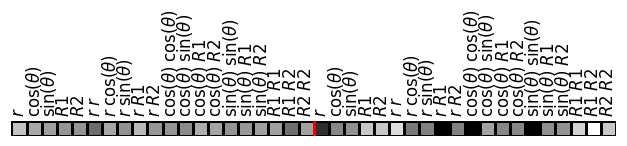

In [21]:
pcolorPlot(np.median(weights, axis = 0), labels = result)

In [28]:
def pcolorPlot2(vals, labels):
    vals_reshaped = vals.reshape(1, -1)
    middle_index = vals_reshaped.shape[1] // 2  # Calculate the middle index

    # Split the values and labels into two halves
    vals_left = vals_reshaped[:, :middle_index]
    vals_right = vals_reshaped[:, middle_index:]
    
    labels_left = labels[:middle_index]
    labels_right = labels[middle_index:]
    
    # Plot for the left part
    fig, ax = plt.subplots(1, 1)
    c = ax.pcolormesh(vals_left, cmap='gray_r', edgecolors='k')
    
    for i, label in enumerate(labels_left):
        ax.text(i + 0.5, 1.25, label, ha='center', va='bottom', fontsize=12, rotation=90, color='black')
    
    plt.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()
    
    # Plot for the right part
    fig, ax = plt.subplots(1, 1)
    c = ax.pcolormesh(vals_right, cmap='gray_r', edgecolors='k')
    
    #for i, label in enumerate(labels_right):
    #    ax.text(i + 0.5, 1.25, label, ha='center', va='bottom', fontsize=12, rotation=90, color='black')
    
    plt.axis('off')
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

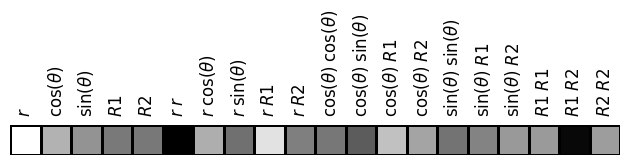

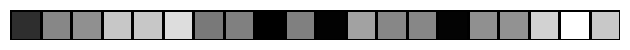

In [29]:
pcolorPlot2(np.median(weights, axis = 0), labels = result)

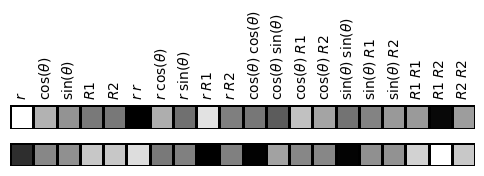

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def pcolorPlot(vals, labels):
    vals_reshaped = vals.reshape(1, -1)
    middle_index = vals_reshaped.shape[1] // 2  # Calculate the middle index

    # Split the values and labels into two halves
    vals_left = vals_reshaped[:, :middle_index]
    vals_right = vals_reshaped[:, middle_index:]
    
    labels_left = labels[:middle_index]
    
    # Create a figure with two subplots, one on top of the other
    fig, (ax_top, ax_bottom) = plt.subplots(2, 1, figsize=(6, 2.5), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0})
    
    # Plot for the top part (with labels)
    c1 = ax_top.pcolormesh(vals_left, cmap='gray_r', edgecolors='k')
    for i, label in enumerate(labels_left):
        ax_top.text(i + 0.5, 1.25, label, ha='center', va='bottom', fontsize=10, rotation=90, color='black')
    ax_top.axis('off')
    ax_top.set_aspect('equal')
    
    # Plot for the bottom part (without labels)
    c2 = ax_bottom.pcolormesh(vals_right, cmap='gray_r', edgecolors='k')
    ax_bottom.axis('off')
    ax_bottom.set_aspect('equal')
    
    # Tighten the layout to reduce the space between subplots
    plt.subplots_adjust(hspace=0.01, top=0.50, bottom=0.20)
    
    plt.show()


pcolorPlot(np.median(weights, axis = 0), labels = result*2)

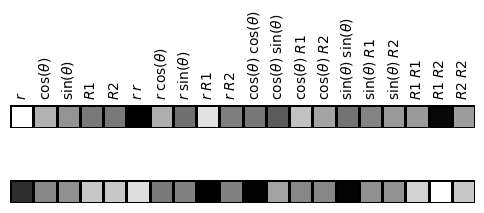

In [50]:
def pcolorPlot(vals, labels, num_parts):
    vals_reshaped = vals.reshape(1, -1)
    total_length = vals_reshaped.shape[1]
    part_size = total_length // num_parts  # Size of each part

    # Create a figure with subplots equal to the number of parts
    fig, axes = plt.subplots(num_parts, 1, figsize=(6, 2.5 * num_parts), gridspec_kw={'height_ratios': [1]*num_parts, 'hspace': 0})
    
    # If there's only one part, axes won't be a list, so we convert it
    if num_parts == 1:
        axes = [axes]
    
    for i in range(num_parts):
        start_idx = i * part_size
        end_idx = start_idx + part_size if i < num_parts - 1 else total_length
        
        vals_part = vals_reshaped[:, start_idx:end_idx]
        labels_part = labels[start_idx:end_idx]
        
        ax = axes[i]
        c = ax.pcolormesh(vals_part, cmap='gray_r', edgecolors='k')
        
        if i == 0:  # Add labels only to the first part
            for j, label in enumerate(labels_part):
                ax.text(j + 0.5, 1.25, label, ha='center', va='bottom', fontsize=10, rotation=90, color='black')
        
        ax.axis('off')
        ax.set_aspect('equal')

    # Adjust the layout based on the number of parts
    plt.subplots_adjust(hspace=0.01, top=0.50, bottom=0.20)
    plt.show()

pcolorPlot(np.median(weights, axis = 0), num_parts=2, labels = result*2)

In [114]:
import os
import numpy as np
import sys
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

import itertools



def path_link(path:str):
    sys.path.append(path)

path_link('/master/code/lib')


from utils.testing_gen import get_mult_data, Parameters_Simulation
import features as ft
from utils.pysr_help import getEdges, get_weights
from utils.loading import loadModel
from utils.tools import makedirs




NB_SIM = 5
NB_STEP = 1000
PATH_MODELS = '/master/code/experimental/pysr/gam/models/exp_1_relu'
DISPLAY_PATH = '/master/code/experimental/pysr/gam/weights_evol/figures'
#MODEL = 'GAM_GNN'
MODEL = 'GAM_GNN-relu'


def scatPlot(weights, sum_weights, radius, names, path, display = False, degree = 2):
    
    
    for i in range(len(names)):
        plt.scatter(radius, weights[:, i])
        plt.xlabel("Radius [micro m]")
        plt.ylabel(f"Weight of {names[i]}")

        name_plot = os.path.join(path, f'{names[i]}.png')
        k = 0
        while os.path.exists(name_plot):
            name_plot = f'{name_plot.split(".")[0]}-{k}.png'
            k+=1


        if display: 
            plt.show()
        else:
            plt.savefig(name_plot)
            plt.close()
    
    # sum plot
    
    for i in range(degree):
        
        plt.scatter(radius,sum_weights[:, i])
        plt.xlabel("Radius [micro m]")
        plt.ylabel(f"Sum Weight - {i}")

        name_plot = os.path.join(path, f'sum-weights-{i}.png')

        k = 0
        while os.path.exists(name_plot):
            name_plot = f'{name_plot.split(".")[0]}-{k}.png'
            k+=1

        if display: 
            plt.show()
        else:
            plt.savefig(name_plot)
            plt.close()



    


def getData(params: Parameters_Simulation, nb:int):
    data = get_mult_data(params, nb)


    dataList = []

    for i in range(data.shape[0]):
        x, y, attr, inds = ft.processSimulation(data[i])

        for i in range(len(x)):
            g = Data(x = x[i][:, 2:], y = y[i], edge_attr = attr[i], edge_index = inds[i])
            dataList.append(g)

        return dataList
    
    


def find_models_and_paths(model_path:str, display_path:str)->tuple:
    model_list = []
    out_list = []
    
    nb = 0

    for root, dirs, files in os.walk(model_path):
        for file in files:
            if file.endswith('pt'):
                model_list.append(os.path.join(root, file))

                name = file.split('.')[0]

                out_list.append(os.path.join(display_path, f'test-{nb}-{name}.png'))
                nb += 1


    return model_list, out_list


def compute_string_products(strings, degree):
    """
    Compute all polynomial products up to a given degree for a list of strings.
    
    Args:
        strings (list of str): The input list of strings.
        degree (int): The maximum degree of the polynomial terms.

    Returns:
        list of str: A list containing all polynomial products.
    """
    num_variables = len(strings)
    products = []

    for d in range(1, degree + 1):
        for combo in itertools.combinations_with_replacement(range(num_variables), d):
            # Create a product string by joining the corresponding strings
            product = ''.join([strings[i] for i in combo])
            products.append(product)

    return products


In [60]:
models, path_out_models = find_models_and_paths(PATH_MODELS, DISPLAY_PATH)

# get the data

params = Parameters_Simulation()
params.nbStep = NB_STEP
dataList = getData(params, nb = NB_SIM)
edges = getEdges(dataList)

variables = [r'$r \;$', r'$\cos(\theta) \;$', r'$\sin(\theta) \;$', r'$R1 \;$', r'$R2 \;$']
degree = 2
result = compute_string_products(variables, degree)

v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:20<00:00, 49.28it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:27<00:00, 36.55it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:21<00:00, 47.07it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:21<00:00, 47.50it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 999/999 [00:19<00:00, 52.39it/s]


In [110]:
def get_sum_gam_weights(model, data):

    resWeights = None

    for graph in data:
        atr = graph.edge_attr

        w_sum = model.GNN.message(None, None, atr).cpu().detach().numpy()


        if resWeights is None:
            resWeights = w_sum

        else:
            resWeights = np.vstack((resWeights, w_sum))


    return resWeights

In [94]:
def get_weights(model, data, nbDim = 2, nbMax = 2, pySr_data = False):
    
    res = None
    resEdges = None

    if pySr_data:

        for graph in data:

            weights, sha = model.get_weights(graph)
            weights = weights.cpu().detach().numpy()
            weights.reshape(sha)

            if res is None:
                res = weights
                shape_edges =  graph.edge_attr.shape
                resEdges = graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()
            else:
                res = np.vstack((res, weights))
                shape_edges =  graph.edge_attr.shape
                v = graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()
                resEdges = np.vstack((resEdges, graph.edge_attr.repeat(1, nbDim).reshape(shape_edges[0] * nbDim, shape_edges[1]).cpu().detach().numpy()))

        return res, resEdges

    else:
        for graph in data:

            weights, sha = model.get_weights(graph)
            weights = weights.cpu().detach().numpy()

            if res is None:
                res = weights

            else:
                res = np.vstack((res, weights))

            if resEdges is None:
                resEdges = graph.edge_attr

            else:
                resEdges = np.vstack((resEdges, graph.edge_attr))

        return res, resEdges

In [ ]:
def get_sum_gam_weights(model, data)

In [95]:
def makedirs(file):
    f = file

    i = 1
    while os.path.exists(f):
        f = f'{file}_{i}'
        i += 1
    
    os.makedirs(f)

    return f

In [96]:
i = 0

model = models[i]
mod = loadModel(MODEL)
std_dict = torch.load(models[i], map_location="cpu")
mod.load_state_dict(std_dict)
mod.eval()

path = path_out_models[i]
makedirs(path)

weights, edgs = get_weights(mod, dataList, nbMax = None)

>>>> loading simplest
INFO >>> with NO encoder
INFO >>> with NO dropout


In [111]:
sum_w = get_sum_gam_weights(mod, dataList)

In [113]:
print(weights.shape)
print(edgs.shape)
print(sum_w.shape)

(298436, 40)
(298436, 5)
(298436, 2)


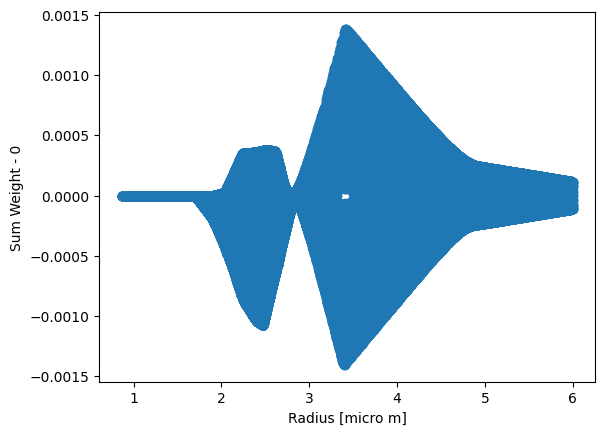

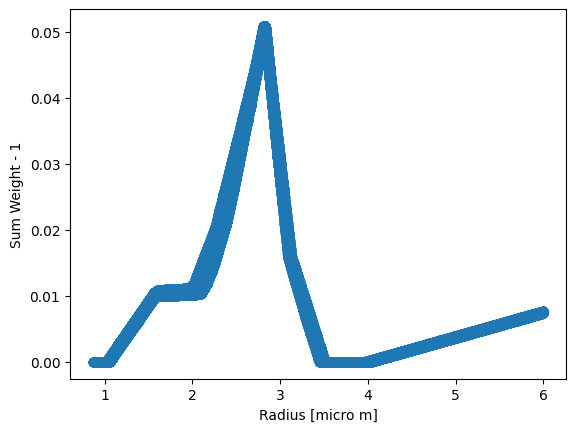

In [118]:
scatPlot(weights, 
                radius = edgs[:, 0], 
                sum_weights=sum_w,
                names = result * 2, 
                path = path, 
                display = True)